In [3]:
from numba import jit
import functions_new_jit as func
import importlib
importlib.reload(func)

##########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

"simulate_riot_sectors" function test

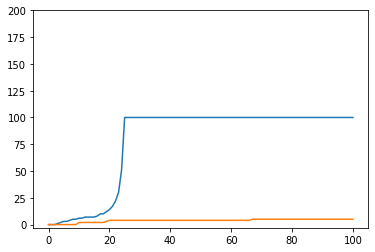

In [63]:
N = 200
average = 45
deviation = 12

agents = func.create_agents(N,average,deviation)
sector0_size = 100
sector1_size = 100

system = func.System(agents, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors(system, steps)

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

100.00%


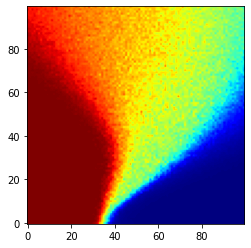

In [37]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

100.00%


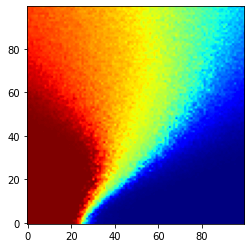

In [39]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 10
simulations = 10

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

100.00%
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 2 0 0 1 1 1 1 1 1 1 1 2 2 2 2 3 3 4 4 4 4 7 7 6 6 5 5 11 11 16 16 19 19 16 16 16 16 43 43 24 24 11 11 28 28 15 15 19 19 22 22 28 28 18 18 26 26 110 110 43 43 34 34 34 34 102 102 59 59 108 108 106 106 116 116 60 60 37 37 46 46 111 111 105 105 106 106 44 44 109 109 49 49 48 48 120 120 113 113 106 106 114 114 114 114 122 122 72 72 69 69 117 117 64 64 88 88 112 112 64 64 112 112 62 62 109 109 126 126 81 81 121 121 108 108 114 114 121 121 117 117 78 78 56 56 

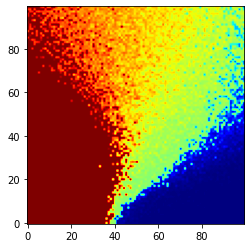

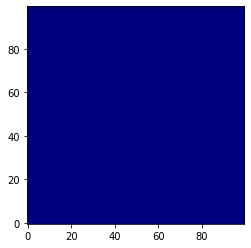

In [66]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 1

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_maior += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

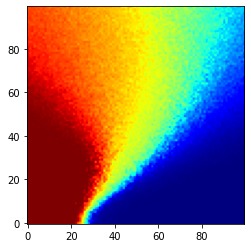

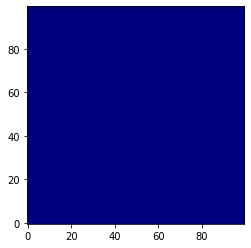

In [43]:
plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_exit" function test

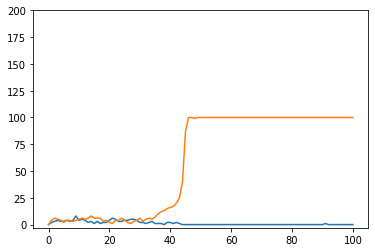

In [38]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_exit(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 25
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_exit(system, steps)[0][steps]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration" function test

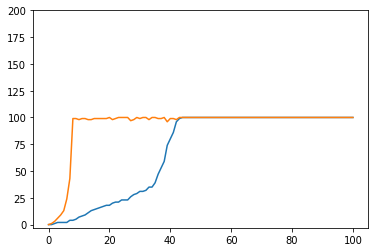

In [23]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_migration_exit" function test

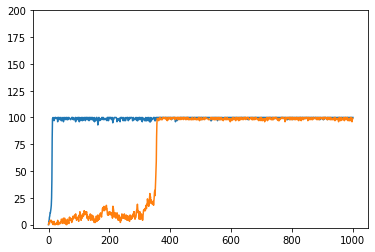

In [27]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

migration_probability = 0.01

progression = func.simulate_riot_sectors_migration_exit(system, steps,migration_probability)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_migration_gregarious" function test

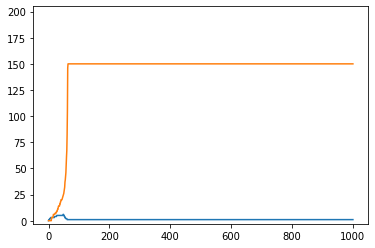

In [31]:
N = 200
average = 55
deviaition = 20

sector0_size = 150
sector1_size = 150
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

progression = func.simulate_riot_sectors_migration_gregarious(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N+5)
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" function test

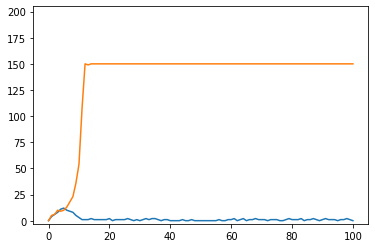

In [34]:
N = 200
average = 35
deviaition = 20

sector0_size = 150
sector1_size = 150
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration_gregarious_exit(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N+5)
plt.show()